# ***Upload the dataset***

In [1]:
#Upload the dataset
from google.colab import files
files.upload()

Saving Tesla.xlsx to Tesla.xlsx


{'Tesla.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00yo\xafZ\xa4\x9bU\xac\xdb\x00\x00\x00;\x02\x00\x00\x0b\x00\x14\x00_rels/.rels\x01\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xad\x92\xc1j\xc30\x0c\x86\xef}\n\xe3{\xa3\xb4\x831F\x93^\xc6\xa0\xb72\xba\x07\xf0l%1\x89-#\xab[\xf6\xf63\x83\xb1\x05J\x19lGI\xff\xff\xf1\x1d\xb4\xdb\xcfaR\xaf\xc8\xd9Sl\xf4\xa6\xaa\xb5\xc2h\xc9\xf9\xd87\xfa\xf9\xf4\xb8\xbe\xd3\xfbv\xb5{\xc2\xc9H\x89\xe4\xc1\xa7\xacJ\'\xe6F\x0f"\xe9\x1e \xdb\x01\x83\xc9\x15%\x8c\xe5\xd2\x11\x07#e\xe4\x1e\x92\xb1\xa3\xe9\x11\xb6u}\x0b\xfc\x93\xa1\xdb\x05S\x1d\\\xa3\xf9\xe06Z\x9d\xde\x13\xfe\x8d\r\x01\xc58#\x06,1\xae\x13\x976\x8b\xc7\\\xe0\x86{\x94F;\xb2\xc7\xb2\xce\x9f\x89\xaa\x905\\\x16\xda\xfe^\x88\xba\xce[| {\x0e\x18\xe5\x92\x17\xce\x82\xd1\xa1\xbb\xaedR\xbaft\xf3\x9fF\xcb\xc4\xb7\xcc<\xc1\x1b\xf1\xf8B4~\xb9\xc0\xe2\x07\xda\xd5\x07PK\x03\x04\x14\x00\x00\x00\x08\x00yo\xafZ\x04!\xd6\x15\xba\x00\x00\x00\x1b\x01\x00\x00\x11\x00\x14\x00docProps/core.xm

# ***Data Understanding***

In [2]:
#Load the dataset
import pandas as pd
df = pd.read_excel('Tesla.xlsx')

In [3]:
#Display first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Volume
0,4/30/2025,279.90,284.45,270.78,282.16,128961102
1,4/29/2025,285.50,293.32,279.47,292.03,108906602
2,4/28/2025,288.98,294.86,272.42,285.88,151731812
3,4/25/2025,261.69,286.85,259.63,284.95,167560703
4,4/24/2025,250.50,259.54,249.20,259.51,94464203


In [4]:
#Display last few rows of the dataset
df.tail()

,Date,Open,High,Low,Close,Volume
3728,7/6/2010,1.33,1.33,1.06,1.07,103189531
3729,7/2/2010,1.53,1.54,1.25,1.28,77127184
3730,7/1/2010,1.67,1.73,1.35,1.46,123448057
3731,6/30/2010,1.72,2.03,1.55,1.59,257916160
3732,6/29/2010,1.27,1.67,1.17,1.59,281749474


In [5]:
#Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3733 entries, 0 to 3732
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3733 non-null   object 
 1   Open    3733 non-null   float64
 2   High    3733 non-null   float64
 3   Low     3733 non-null   float64
 4   Close   3733 non-null   float64
 5   Volume  3733 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 175.1+ KB


# ***Data Cleaning***

In [6]:
#Identify missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [7]:
#Identify duplicate rows
import pandas as pd
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [8]:
#Change datatype of column - 'Date'
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Change datatype of Volume
df['Volume'] = df['Volume'].astype(float)

In [10]:
#Sort 'Date' column
df.sort_values(by='Date', ascending=True, inplace=True)

In [11]:
#Display Date intervals
date_diffs = df['Date'].diff().value_counts()
print(date_diffs)

Date
1 days    2921
3 days     673
4 days     100
2 days      37
5 days       1
Name: count, dtype: int64


In [12]:
#Display summary statistics of the dataset
df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

,Open,High,Low,Close,Volume
count,3733.000000,3733.000000,3733.000000,3733.00000,3.733000e+03
mean,86.585130,88.556448,84.499930,86.55862,9.699560e+07
std,112.211918,114.822066,109.374901,112.11499,7.718697e+07
min,1.080000,1.110000,1.000000,1.05000,1.779212e+06
25%,12.340000,12.590000,12.140000,12.35000,4.979150e+07
50%,18.580000,18.860000,18.290000,18.61000,8.277153e+07
75%,186.540000,191.080000,182.550000,187.58000,1.225745e+08
max,475.900000,488.540000,457.510000,479.86000,9.140822e+08


# ***Feature Engineering***

In [13]:
#Add technical indicators
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=0d8218cc2cf82b3a1d7adc94f396c7d5f1017b517829d4f27efcfbfefb02222c
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [14]:
import ta
import pandas as pd
import numpy as np

#Commodity channel Index
cci_indicator = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['cci_14'] = cci_indicator.cci()
#Average true range
atr_indicator = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['atr_14'] = atr_indicator.average_true_range()
#On-Balance Volume
obv_indicator = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume'])
df['obv'] = obv_indicator.on_balance_volume()

In [15]:
#Drop rows which consists of missing values
df.dropna(inplace=True)

# ***Model Preprocessing***

In [16]:
#Create target variable
df['Target']= df['Close'].shift(-1)

In [17]:
#Drop column - 'Close'
df.drop(['Close'], axis=1, inplace=True)

In [18]:
#Drop rows which has missing values
df.dropna(inplace=True)

In [19]:
#Drop 'Date' column
df.drop(['Date'], axis=1, inplace=True)

In [20]:
#Define feature set and target
X = df.drop(columns=['Target'])
y = df['Target']

In [21]:
# Check skewness of each numeric feature (X)
print("Feature Skewness:")
print(X.skew().sort_values(ascending=False))

# Check skewness of target variable (y)
print("\nTarget Skewness:")
print(y.skew())

Feature Skewness:
Volume    2.318347
atr_14    1.376855
High      1.131739
Open      1.131656
Low       1.126299
obv       0.545498
cci_14   -0.081126
dtype: float64

Target Skewness:
1.1268872697140517


In [22]:
#Apply log transformation to column - 'Volume', 'atr_14', 'High', 'Open', 'Low' and 'Target'
import numpy as np

X['Volume'] = np.log1p(X['Volume'])
X['atr_14'] = np.log1p(X['atr_14'])
X['High'] = np.log1p(X['High'])
X['Open'] = np.log1p(X['Open'])
X['Low'] = np.log1p(X['Low'])
y = np.log1p(y)

In [23]:
#Calculate split index
split_index = int(len(df) * 0.8)

#Create train and test sets
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# ***Random Forest and XGBoost Regressor***

In [24]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true_log, y_pred_log, dataset_name=""):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    print(f"\n{dataset_name} Evaluation:")
    print("R² Score :", r2_score(y_true, y_pred))
    print("RMSE     :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE      :", mean_absolute_error(y_true, y_pred))
    print("MSE      :", mean_squared_error(y_true, y_pred))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_train_pred_log_rf = rf.predict(X_train)
y_test_pred_log_rf = rf.predict(X_test)
evaluate(y_train, y_train_pred_log_rf, "Random Forest - Train")
evaluate(y_test, y_test_pred_log_rf, "Random Forest - Test")

#XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_train_pred_log_xgb = xgb.predict(X_train)
y_test_pred_log_xgb = xgb.predict(X_test)
evaluate(y_train, y_train_pred_log_xgb, "XGBoost - Train")
evaluate(y_test, y_test_pred_log_xgb, "XGBoost - Test")


Random Forest - Train Evaluation:
R² Score : 0.9996189296593134
RMSE     : 1.71923387444663
MAE      : 0.6044735084327755
MSE      : 2.955765115044771

Random Forest - Test Evaluation:
R² Score : 0.9374433936834744
RMSE     : 15.921483936831002
MAE      : 11.72472275174553
MSE      : 253.4936507507676

XGBoost - Train Evaluation:
R² Score : 0.9992535404370552
RMSE     : 2.4062210875834875
MAE      : 0.9231182255480466
MSE      : 5.789899922331462

XGBoost - Test Evaluation:
R² Score : 0.9056340218069289
RMSE     : 19.55485841978979
MAE      : 14.796096674601241
MSE      : 382.39248781802365


# ***Feature Importance***

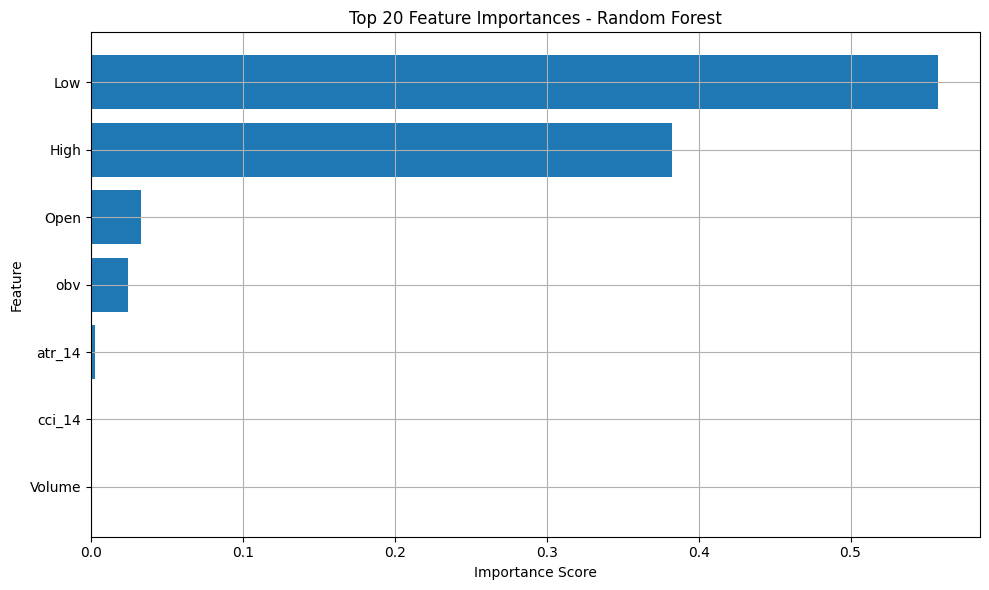

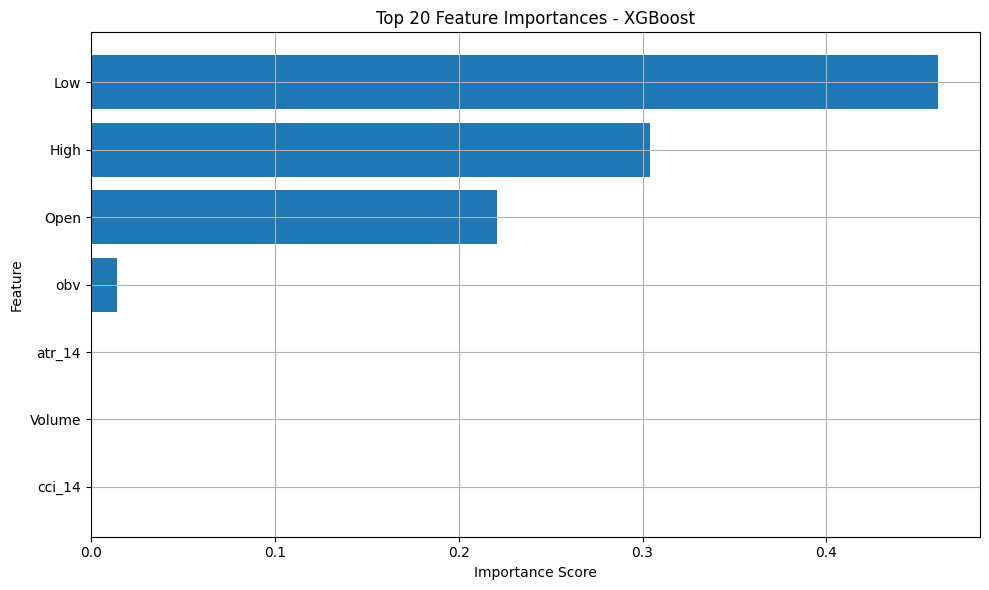

In [25]:
#Display feature importance of random forest regressor
import pandas as pd
import matplotlib.pyplot as plt
rf_importances = rf.feature_importances_
xgb_importances = xgb.feature_importances_

rf_feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

xgb_feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

#random forest regressor
plt.figure(figsize=(10, 6))
plt.barh(rf_feat_df['Feature'][:20][::-1], rf_feat_df['Importance'][:20][::-1])
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

#XGboost regressor
plt.figure(figsize=(10, 6))
plt.barh(xgb_feat_df['Feature'][:20][::-1], xgb_feat_df['Importance'][:20][::-1])
plt.title('Top 20 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

# ***Time-series cross validation***

In [26]:
#Drop low-importance features
X_reduced = X.drop(columns=['Volume' ,'atr_14', 'cci_14'])

In [27]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Create time series-aware splits
tscv = TimeSeriesSplit(n_splits=5, test_size=100)

# Random Forest with TimeSeriesSplit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores_ts = cross_val_score(rf_model, X_reduced, y, cv=tscv, scoring='r2')
print("Random Forest Time Series CV R² Scores:", rf_cv_scores_ts)
print("Average R²:", np.mean(rf_cv_scores_ts))

#XGBoost with timeSeriesSplit
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_cv_scores_ts = cross_val_score(xgb_model, X_reduced, y, cv=tscv, scoring='r2')
print("\nXGBoost Time Series CV R² Scores:", xgb_cv_scores_ts)
print("Average R²:", np.mean(xgb_cv_scores_ts))

Random Forest Time Series CV R² Scores: [0.93997468 0.87971439 0.84438443 0.90522606 0.91971648]
Average R²: 0.8978032093166197

XGBoost Time Series CV R² Scores: [0.93568134 0.89260422 0.88256376 0.89729862 0.8875272 ]
Average R²: 0.8991350274575289


# ***Hyperparameter Tuning***

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5, test_size=100)

#Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_reduced, y)

# Output best parameters and score
print("=" * 60)
print("Best Random Forest Parameters:")
print(rf_grid.best_params_)
print("Best RF TimeSeries CV R² Score:", rf_grid.best_score_)

#XGBoost Hyperparameter tuning
xgb_params = {
    'n_estimators': [100,200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=xgb_params,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_reduced, y)

# Output best parameters and score
print("\nBest XGBoost Parameters:")
print(xgb_grid.best_params_)
print("Best XGBoost TimeSeries CV R² Score:", xgb_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Parameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF TimeSeries CV R² Score: 0.9035483244144832
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best XGBoost Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost TimeSeries CV R² Score: 0.9059245653761094


# ***Model Implementation***

In [29]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

rf_final = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)
rf_final.fit(X_train[X_reduced.columns], y_train)
rf_pred_log = rf_final.predict(X_test[X_reduced.columns])

xgb_final = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_final.fit(X_train[X_reduced.columns], y_train)
xgb_pred_log = xgb_final.predict(X_test[X_reduced.columns])

def evaluate_model(name, y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    print(f"\n{name} Evaluation")
    print("-" * 50)
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))

evaluate_model("Random Forest (Optimized)", y_test, rf_pred_log)
evaluate_model("XGBoost (Optimized)", y_test, xgb_pred_log)


Random Forest (Optimized) Evaluation
--------------------------------------------------
R² Score: 0.9521631148768359
RMSE: 13.92285817985414
MAE: 10.547404274624888
MSE: 193.84597989633136

XGBoost (Optimized) Evaluation
--------------------------------------------------
R² Score: 0.9389057791382471
RMSE: 15.734285208385348
MAE: 12.14066132576235
MSE: 247.56773101881396


# ***Model evaluation***

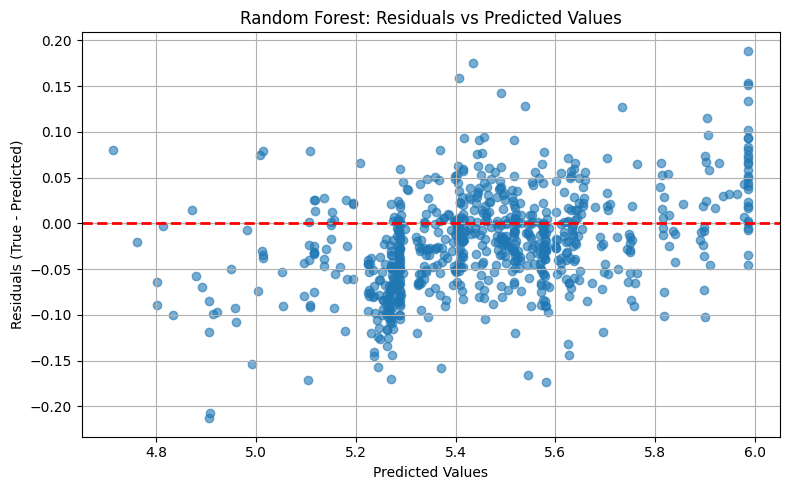

In [30]:
#Residuals plot
import matplotlib.pyplot as plt
residuals = y_test - rf_pred_log
plt.figure(figsize=(8, 5))
plt.scatter(rf_pred_log, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Random Forest: Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (True - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

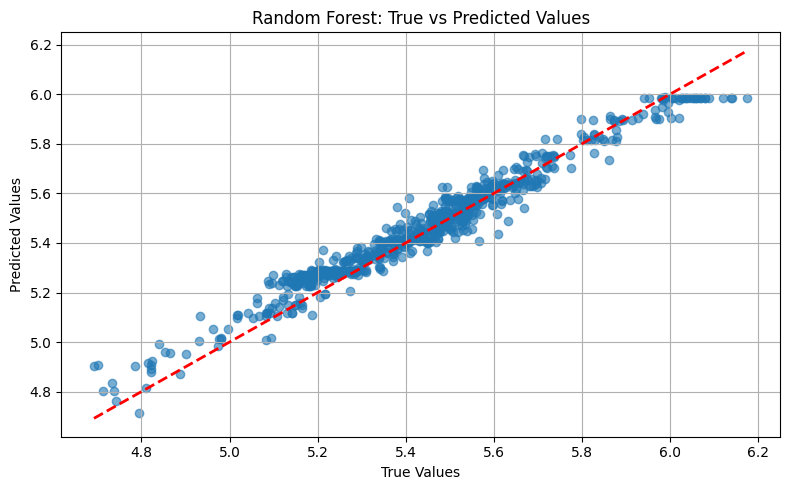

In [31]:
#True vs. Predicted value
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_pred_log, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.title("Random Forest: True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()